# Supervised learning: Logistic regression vs. Decision Trees
Welcome to week five of the course!

* Learn how to build a logistic regression model given data
* Learn how to build and visualize a decision tree in Python and interpret its results
* Understand the similarities and the differences between the two

We will be using a titanic data set and learn which passengers tended to survive at higher rates. In other words, 
we will be predicting a categorical outcome.

## Import data

In [1]:
%cd C:\Users\Max\Documents\SMU\PythonForDeepLearningCourse\Week5

C:\Users\Max\Documents\SMU\PythonForDeepLearningCourse\Week5


In [2]:
#import data
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv')
len(df)

1310

In [8]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
len(df)

0

In [6]:
df.pclass.value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [7]:
df.sex.value_counts()

male      843
female    466
Name: sex, dtype: int64

In [19]:
df[['sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 1 columns):
sex    1309 non-null object
dtypes: object(1)
memory usage: 10.3+ KB


In [8]:
df.survived.value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

In [ ]:
#goal: predict survival rate based on gender and class

In [3]:
#remove missing values: 
df=df[(df.sex.isnull()==False)&(df.survived.isnull()==False)&(df.pclass.isnull()==False)]
len(df)

1309

In [4]:
#convert gender to dummy: 
df['sex_int']=df['sex'].map(lambda x: 1 if x=="male" else 0)

In [13]:
df.sex_int.value_counts()

1    843
0    466
Name: sex_int, dtype: int64

In [5]:
Xtrain=df[['sex_int','pclass']]
ytrain=df[['survived']]

# Logistic regression 


### Sigmoid
You will learn to use logistic regression to predict a binary outcome. 
* The sigmoid function is defined as: 

$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

It maps the input 'z' to a value that ranges between 0 and 1, and so it can be treated as a probability. 

In [6]:
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    

    # calculate the sigmoid of z
    h = 1 / (1+np.exp(-z))

    
    return h

### Logistic regression: regression and a sigmoid

Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

Linear Regression:
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
Note that the $\theta$ values are "weights". 

Logistic regression
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$
We will refer to 'z' as the 'logits'.

In [ ]:
#note that z is the same as a linear regression equation

### Logistic Regression Cost function and Gradient

The cost function used for logistic regression is the average of the log loss across all training examples:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ is the number of training examples
* $y^{(i)}$ is the actual label of the i-th training example.
* $h(z(\theta)^{(i)})$ is the model's prediction for the i-th training example.

The loss function for a single training example is
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* All the $h$ values are between 0 and 1, so the logs will be negative. That is the reason for the factor of -1 applied to the sum of the two loss terms. 
* Note that when the model predicts 1 ($h(z(\theta)) = 1$) and the label $y$ is also 1, the loss for that training example is 0. 
* Similarly, when the model predicts 0 ($h(z(\theta)) = 0$) and the actual label is also 0, the loss for that training example is 0. 
* However, when the model prediction is close to 1 ($h(z(\theta)) = 0.9999$) and the label is 0, the second term of the log loss becomes a large negative number, which is then multiplied by the overall factor of -1 to convert it to a positive loss value. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ The closer the model prediction gets to 1, the larger the loss. 

* Likewise, if the model predicts close to 0 ($h(z) = 0.0001$) but the actual label is 1, the first term in the loss function becomes a large number: $-1 \times log(0.0001) \approx 9.2$.  The closer the prediction is to zero, the larger the loss.

* So in summary, our loss gets very large when we mispredict, and therefore, the predictions get adjusted to make the loss as small as possible.

### Updating the weights

To update your weight vector $\theta$, we apply gradient descent to iteratively improve model's predictions.  
The gradient of the cost function $J$ with respect to one of the weights $\theta_j$ is:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x_j \tag{5}$$
* 'i' is the index across all 'm' training examples.
* 'j' is the index of the weight $\theta_j$, so $x_j$ is the feature associated with weight $\theta_j$

* To update the weight $\theta_j$, we adjust it by subtracting a fraction of the gradient determined by $\alpha$:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* The learning rate $\alpha$ is a value that we choose to control how big a single update will be.
* Gradient descent is one type of optimization.


### Implementing gradient descent function
* The number of iterations `num_iters` is the number of times that you'll use the entire training set.
* For each iteration, calculate the cost function using all training examples (there are `m` training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias/intercept term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$
* Remember: vectorization uses principles of parallel computing on a single CPU to make computations more efficient.

In [7]:
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    '''
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x, theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = (-1./m)*(np.dot(np.transpose(y),np.log(h))+np.dot(np.transpose(1-y),np.log(1-h)))
        if i%100==0:
            print("cost is: ",J)

        # update the weights theta
        theta = theta - (alpha / m)*np.dot((np.transpose(x)),(h-y))
        
    J = float(J)
    return J, theta

### Create design matrix

In [9]:

X=np.hstack([np.ones((len(Xtrain),1)), Xtrain])
y=ytrain.values
print("the shape of X is: ", X.shape)
print("the shape of y is: ", y.shape)
X[0:10, 0:10]
#notice below that the first column of X is all 1's - this is for the bias/intercept term. Columns 2 and 3 
#correspond to features 2 and 3 - gender and social class - of our data set.

the shape of X is:  (1309, 3)
the shape of y is:  (1309, 1)


array([[1., 0., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

In [23]:
np.max(X[:,2]), np.min(X[:,2]) #note: 3rd class is max, 1st class is min

(3.0, 1.0)

In [10]:
Xtrain.head()

,sex_int,pclass
0,0,1.0
1,1,1.0
2,0,1.0
3,1,1.0
4,0,1.0


### Training the Model

To train the model:
* Call `gradientDescent`function



In [1]:
# training labels corresponding to X

X = X
Y = y
# Apply gradient descent
alpha=0.01 #feel free to experiment with other alphas if you wish, such as .001, .0001 and 0.1
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), .001, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

NameError: name 'X' is not defined

In [ ]:
#notice above that cost should go down. You can use 'reshape' or 'squeeze' numpy methods to change cost output to 
#a single-dimension vector and plot the cost vs. iteration number if you like.

### Testing logistic regression



* Given a persion, extract properly their features from the data.
* Apply the model's learned weights above on the features to get the logits.
* Apply the sigmoid to the logits to get the prediction (a value between 0 and 1).
* Here, we are only applying the model on the training data, but in the assignment for this week you will do so for unseen data to see how the model generalizes. 

$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$

* Given the data and the weights of the trained model, calculate the accuracy of the logistic regression model. 
* If the prediction is > 0.5, set the model's classification `y_hat` to 1, otherwise set the model's classification `y_hat` to 0.
* A prediction is accurate when `y_hat` equals `test_y`.  Sum up all the instances when they are equal and divide by `m`.

In [12]:
def test_logistic_regression(test_x, test_y,theta):
    """
    Input: 
        test_x: a list of individuals
        test_y: (m, 1) vector with the corresponding labels for the list of individuals
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of individuals classified correctly) / (total # of individuals)
    """
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # the list for storing predictions
    y_hat = []
    # get the label prediction for the individual
    y_pred = sigmoid(np.dot(X, theta))
    print(y_pred.shape)
    m=test_y.shape[0]
    y_hat=1.0*(y_pred.reshape(m,) > 0.5)

    accuracy = (np.sum(y_hat==test_y.reshape(m,))) / (m)

    ### END CODE HERE ###
    
    return accuracy, y_hat

In [13]:
tmp_accuracy, y_hat = test_logistic_regression(X, Y, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.8f}")

(1309, 1)
Logistic regression model's accuracy = 0.78304049


# Decision trees

In [14]:
subprocess_dir=r'C:\Users\Max\Documents\SMU\PythonForDeepLearningCourse\Week5'
from sklearn.externals.six import StringIO  
from IPython.display import Image,display 
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
import subprocess

In [15]:
#need to also install graphviz
import os     
os.environ["PATH"] += os.pathsep + r'C:\Users\Max\Anaconda3\Library\bin\graphviz'

In [ ]:
#the above statements are required to be able to visualize the tree

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<sex_int &le; 0.5<br/>gini = 0.472<br/>samples = 1309<br/>value = [809, 500]>, fillcolor="#e5813961"] ;
1 [label=<pclass &le; 2.5<br/>gini = 0.397<br/>samples = 466<br/>value = [127, 339]>, fillcolor="#399de59f"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.127<br/>samples = 250<br/>value = [17, 233]>, fillcolor="#399de5ec"] ;
1 -> 2 ;
3 [label=<gini = 0.5<br/>samples = 216<br/>value = [110, 106]>, fillcolor="#e5813909"] ;
1 -> 3 ;
4 [label=<pclass &le; 1.5<br/>gini = 0.309<br/>samples = 843<br/>value = [682, 161]>, fillcolor="#e58139c3"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label=<gini = 0.449<br/>samples = 179<br/>value = [118, 61]>, fillcolor="#e581397b"] ;
4 -> 5 ;
6 [label=<gini = 0.256<br/>samples = 664<br/>value = [564, 100]>, fillcolor="#e58139d2"] ;
4 -> 6 ;
}
<class 'pydotplus.g

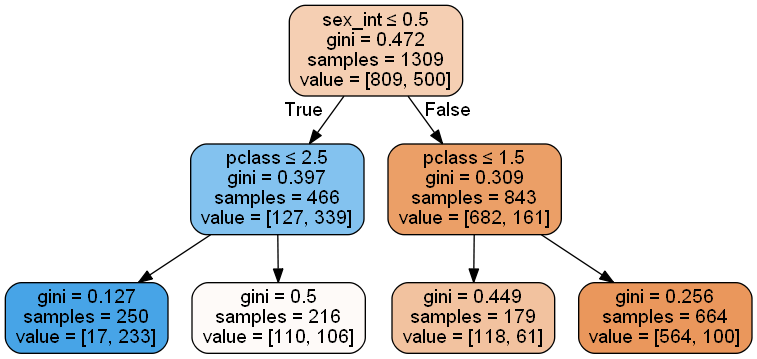

<class 'str'>


In [16]:
def build_decision_tree(maxdepth,minsamplesleaf,Xtrain,ytrain,subprocess_dir):
    from sklearn import tree
    import subprocess
    dt = tree.DecisionTreeClassifier(max_depth=maxdepth, min_samples_leaf=minsamplesleaf, presort=True) 
                                     #max_leaf_nodes=5, 
                                     #class_weight=None )
    X_train=Xtrain
    y_train=ytrain
    var=X_train.columns.values
    dt.fit(X_train, y_train)
    dot_data = StringIO()
    dotfile='tree.dot'
    export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=var)
    print(dot_data.getvalue())
    #above creates an xml / dot file of the fitted tree
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    print(type(graph))
    display(Image(graph.create_png()))
    graph.write_png('tree.png')
    print(type(dot_data.getvalue()))
    fh = open(dotfile, 'w')  
    fh.write(dot_data.getvalue())  
    fh.close()  
    graph2 = pydotplus.graph_from_dot_file('tree.dot')
    return graph2, dt
    #the above subprocess runs the dot.exe executable file, which 
    #takes as input the tree.dot word file and outputs a tree diagram into 
    #the pngfile - tree.png file in our current directory
graph, dt=build_decision_tree(2,100,Xtrain,ytrain,subprocess_dir)

In [ ]:
#what do we obverve from the above tree?
#we can see a slight interaction between gender and the social class the passengers were in on titanic: 
#for females, first and second class passengers had almost twice the survival rate than 3rd class passengers; 
#for males, first class passengers had more than twice the survival rate than non-first class passengers.  
#We can conclude from the above that females in the second class were probably treated as somewhat superior to males in the second class.
#in addition, we see that females had overall a higher survival rate than males. 

In [17]:
predictions=dt.predict(X[:,1:]) #get predictions using the tree model above

In [18]:
type(predictions)

numpy.ndarray

In [19]:
predictions.shape

(1309,)

In [20]:
Y.shape

(1309, 1)

In [22]:
#obtain the accuracy of the tree model on training data and compare against Logistic Regression:
tree_accuracy=np.sum(predictions==Y.reshape(1309,)) / len(predictions)
print(f"Decision tree model's accuracy = {tree_accuracy:.8f}")

Decision tree model's accuracy = 0.78304049


In [ ]:
#with decision tree we have achieved accuracy of about 78%. 
#how much better is it really than no model? Can you answer this question? No model means just labeling every 
#individual as either survived or not survived and computing the maximum accuracy - then compare against the model 
#prediction

In [ ]:
#Notice that decision tree accuracy is identical to the logistic regression accuracy! Can you explain why?
#Notice that we have 2 categorical features. In the decision tree, we have 4 possible paths from left to right from the tree: 
#path 1: female and class 1 or 2 - predicted survival rate = 0.93
#path 2: female and class 3 - predicted survival rate = 0.49
#path 3: male and class 1 - predicted survival rate = 0.34
#path 4: male and class 2 or 3 - predicted survival rate = 0.15
#From the above we can see that only females from class 1 and 2 would be predicted as survivors, while everyone else
#would be predicted as non-survivors for any given person. Notice that this gives an inaccurate prediction in many cases
#for females in class 3, since almost half of them actually survived. 
#notice also that the prediction we used uses 0.5 as cutoff, which means that the predicted overall survival rate is 
#18%, while initial true survival rate is about 38% (please check this). So, overall, we are under predicting, and so
#the cutoff might need to be adjusted - but that is a separate issue, and for now let us use the same cutoff to compare
#models. 

In [32]:
#let us now understand how logistic regression makes predictions based on the above: 
#if female and class 1 or class 2: 
prediction1 = sigmoid(np.dot(np.array([1,0,1]),theta))
prediction2 = sigmoid(np.dot(np.array([1,0,2]),theta))
print("for females of class 1 or class 2, prediction is: ", min(1*(prediction1[0]>0.5),1*(prediction2[0]>0.5) ))
#if female and class 3: 
prediction = sigmoid(np.dot(np.array([1,0,3]),theta))
print("for females of class 3, prediction is: ", 1*(prediction[0]>0.5))
#if male and class 1: 
prediction = sigmoid(np.dot(np.array([1,1,1]),theta))
print("for males of class 1, prediction is: ", 1*(prediction[0]>0.5))
#if male and class 2 or 3: 
prediction1 = sigmoid(np.dot(np.array([1,1,2]),theta))
prediction2 = sigmoid(np.dot(np.array([1,1,3]),theta))
print("for males of class 2 or 3, prediction is: ", max(1*(prediction1[0]>0.5), 1*(prediction2[0]>0.5)))

for females of class 1 or class 2, prediction is:  1
for females of class 3, prediction is:  0
for males of class 1, prediction is:  0
for males of class 2 or 3, prediction is:  0


In [ ]:
#notice above that the results are identical as for decision tree, and that is why we get the same accuracy. 
#also, note that we have exhausted above all 6 possibilities of the paths, just like was shown using decision tree, since
#we have 2 possible values for gender and 3 for class. 
#So, in essence, the boundary used for both models is identical, i.e. only females of 1st or second class are predicted 
#to survive, others are not, and that is why 2 very different models produce identical results. 

In [42]:
help(dt)

Help on DecisionTreeRegressor in module sklearn.tree.tree object:

class DecisionTreeRegressor(BaseDecisionTree, sklearn.base.RegressorMixin)
 |  DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential splits,
 |      and "mae" for the mean abs